In [66]:
import networkx as nx
from utils import *
import matplotlib.pyplot as plt
import random
import collections


num_runs = 100
num_nodes = 100

greens = []
reds = []
yellows = []
oranges = []

payment_chain_lengths = []

payments_to_seller = []

num_small_loops = int(num_runs / 10)

for _ in range(10):

    for __ in range(num_small_loops):


        G = nx.connected_watts_strogatz_graph(num_nodes, 8, 1)

        valuations = {}
        for i in range(len(G.nodes)):
            valuations[i] = {"valuation": random.randint(0, 100)}
        valuations[0] = {"valuation": 0}

        nx.set_node_attributes(G, valuations)

        w = get_w(valuations)
        C = get_C(G, w)

        exposed = set()
        for i in C:
            for n in G.neighbors(i):
                if n not in exposed and n not in C:
                    exposed.add(n)

        color_map = []
        for i in G.nodes:
            if i == 0:
                color_map.append('yellow')
                continue
            if i in C:
                color_map.append('red')
            elif i in exposed:
                color_map.append('orange')
            else:
                color_map.append('green')

        p = get_payments(G, C, w)

        a = get_allocation(G, C, p)

        final_p = get_final_payments(G, C, a, p)


        # ------------------------------------------------------------

        counter = collections.Counter(color_map)

        yellows.append(counter['yellow'])
        greens.append(counter['green'])
        oranges.append(counter['orange'])
        reds.append(counter['red'])

        payment_chain_length = len(final_p)

        payment_chain_lengths.append(payment_chain_length)

        if payment_chain_length != 0:
            payments_to_seller.append([final_p[i] for i in final_p if 0 in i][0])
        else:
            payments_to_seller.append(0)
            
    print("%s %% done" % ((_+1) * 10))



10 % done
20 % done
30 % done
40 % done
50 % done
60 % done
70 % done
80 % done
90 % done
100 % done


0.772
0.1151
0.10289999999999999
0.01
3.99
48.44


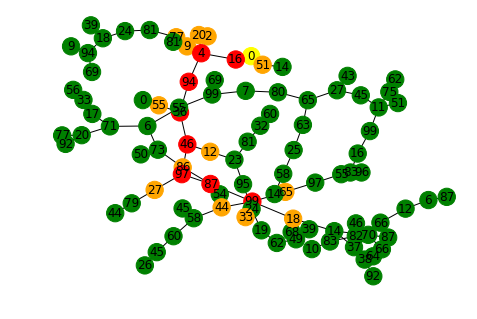

In [59]:
# 2
nx.draw(G, node_color=color_map, with_labels=True, labels=nx.get_node_attributes(G, 'valuation'))
print(sum(greens) / num_nodes / num_runs)
print(sum(oranges) / num_nodes / num_runs)
print(sum(reds) / num_nodes / num_runs)
print(sum(yellows) / num_nodes / num_runs)
print(sum(payment_chain_lengths) / num_runs)
print(sum(payments_to_seller) / num_runs)

0.9036
0.0764
0.01
0.01
1.0
98.43


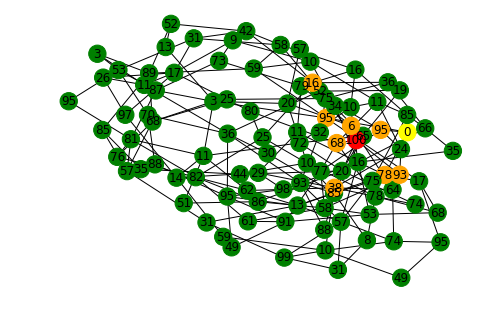

In [53]:
# 4
nx.draw(G, node_color=color_map, with_labels=True, labels=nx.get_node_attributes(G, 'valuation'))
print(sum(greens) / num_nodes / num_runs)
print(sum(oranges) / num_nodes / num_runs)
print(sum(reds) / num_nodes / num_runs)
print(sum(yellows) / num_nodes / num_runs)
print(sum(payment_chain_lengths) / num_runs)
print(sum(payments_to_seller) / num_runs)

0.8652
0.1148
0.01
0.01
1.0
98.48


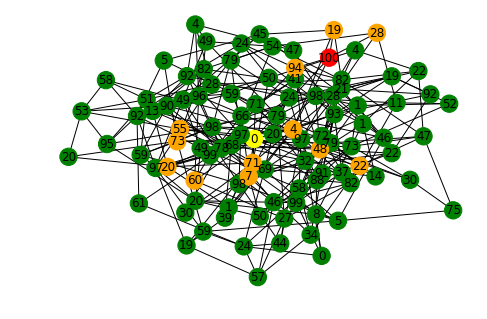

In [63]:
# 6
nx.draw(G, node_color=color_map, with_labels=True, labels=nx.get_node_attributes(G, 'valuation'))
print(sum(greens) / num_nodes / num_runs)
print(sum(oranges) / num_nodes / num_runs)
print(sum(reds) / num_nodes / num_runs)
print(sum(yellows) / num_nodes / num_runs)
print(sum(payment_chain_lengths) / num_runs)
print(sum(payments_to_seller) / num_runs)

0.8273
0.1527
0.01
0.01
1.0
98.73


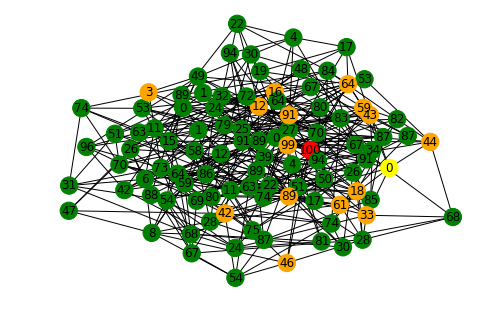

In [67]:
# 8
nx.draw(G, node_color=color_map, with_labels=True, labels=nx.get_node_attributes(G, 'valuation'))
print(sum(greens) / num_nodes / num_runs)
print(sum(oranges) / num_nodes / num_runs)
print(sum(reds) / num_nodes / num_runs)
print(sum(yellows) / num_nodes / num_runs)
print(sum(payment_chain_lengths) / num_runs)
print(sum(payments_to_seller) / num_runs)

{(5, 0): 13, (12, 5): 14}


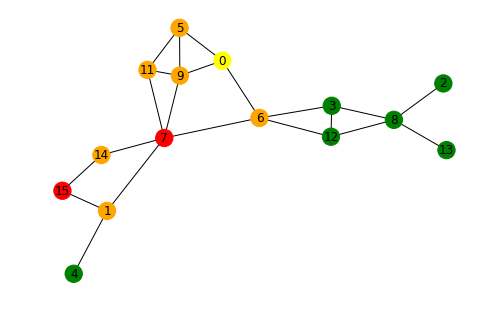

In [102]:
num_nodes = 20


G = nx.Graph()

G.add_nodes_from(list(range(0,15)))
edges = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 4), (2, 4), (2, 5), (3, 5), (3, 6), (3, 7), (4, 5), (5, 8), (5, 9), (6, 7), (6, 10), (7, 10), (8, 11), (8, 12), (9, 12), (10, 13), (10, 14)]

G.add_edges_from(edges)


vals = [0, 5, 9, 6, 11, 7, 3, 12, 1, 14, 8, 4, 15, 2, 13]
valuations = {}
for i in range(len(G.nodes)):
    valuations[i] = {"valuation": vals[i]}

nx.set_node_attributes(G, valuations)

w = get_w(valuations)
C = get_C(G, w)

exposed = set()
for i in C:
    for n in G.neighbors(i):
        if n not in exposed and n not in C:
            exposed.add(n)

color_map = []
for i in G.nodes:
    if i == 0:
        color_map.append('yellow')
        continue
    if i in C:
        color_map.append('red')
    elif i in exposed:
        color_map.append('orange')
    else:
        color_map.append('green')

p = get_payments(G, C, w)

a = get_allocation(G, C, p)

final_p = get_final_payments(G, C, a, p)

nx.draw(G, node_color=color_map, with_labels=True, labels=nx.get_node_attributes(G, 'valuation'))
print(final_p)

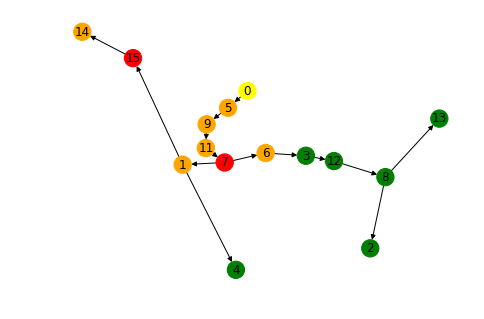

In [155]:
T = nx.dfs_tree(G, source=0)
color_map = []
for i in T.nodes:
    if i == 0:
        color_map.append('yellow')
        continue
    if i in C:
        color_map.append('red')
    elif i in exposed:
        color_map.append('orange')
    else:
        color_map.append('green')

nx.draw(T, node_color=color_map, with_labels=True, labels=nx.get_node_attributes(G, 'valuation'))